# INSURANCE


# Data Import
Importing training data set(existing clients' information of the Insurance Company)


In [1]:
import numpy as np
import pandas as pd


# import tools for drawing the charts and diagrams by sns and plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r'D:\polimi\terms\September 2020\machine learning\project\model.csv')    # importing the data(excel file)
                                                                                          # into pandas format 

In [38]:
df.head()

,id,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target
0,1,Female,44,1,M,30,No,1-2 Year,Yes,25741,154,152,0
1,2,Male,23,1,M,3,Yes,< 1 Year,No,2630,152,256,0
2,3,Male,43,1,C,28,No,1-2 Year,Yes,70720,52,224,0
3,4,Male,60,1,B,28,Yes,1-2 Year,No,48512,26,86,0
4,5,Female,42,1,B,46,No,1-2 Year,Yes,32169,124,132,0


In [39]:
df.shape

(102351, 13)

In [2]:
del df['id']    #delete the id columns in form the DataFrame

In [3]:
df=df.dropna(axis=0)  #delete each row which include atleast one NAN value.

In [43]:
df.shape

(97260, 12)

In [11]:
df.shape

(102351, 13)

In [17]:
df.isnull().sum()    #showing the numbers os the NAN value of each attribute

Gender                  0
Age                     0
Driving_License         0
Licence_Type            0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Seniority               0
Target                  0
dtype: int64

In [18]:
df.dtypes     #showing the type of each attribute[categorical attributes: object, Numerical attribute: int64]

Gender                  object
Age                      int64
Driving_License          int64
Licence_Type            object
Region_Code              int64
Previously_Insured      object
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel     int64
Seniority                int64
Target                   int64
dtype: object

In [4]:
df['Driving_License'] = df.Driving_License.astype(str)   #treating the ['Driving_license'] attribute as the string instead of 
                                                         # int64
 

In [20]:
df.dtypes


Gender                  object
Age                      int64
Driving_License         object
Licence_Type            object
Region_Code              int64
Previously_Insured      object
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel     int64
Seniority                int64
Target                   int64
dtype: object

# Seperating Categorical and Numerical Attributes

In [5]:
df_categorical = df.select_dtypes(include=['object'])   
df_categorical

,Gender,Driving_License,Licence_Type,Previously_Insured,Vehicle_Age,Vehicle_Damage
0,Female,1,M,No,1-2 Year,Yes
1,Male,1,M,Yes,< 1 Year,No
2,Male,1,C,No,1-2 Year,Yes
3,Male,1,B,Yes,1-2 Year,No
4,Female,1,B,No,1-2 Year,Yes
...,...,...,...,...,...,...
102346,Female,1,B,Yes,< 1 Year,No
102347,Female,1,M,No,1-2 Year,Yes
102348,Male,1,M,No,> 2 Years,Yes
102349,Female,1,M,Yes,< 1 Year,No


In [6]:
df_numerical =df.select_dtypes(include=['int64','float64'])
df_numerical

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Seniority,Target
0,44,30,25741,154,152,0
1,23,3,2630,152,256,0
2,43,28,70720,52,224,0
3,60,28,48512,26,86,0
4,42,46,32169,124,132,0
...,...,...,...,...,...,...
102346,25,32,34695,152,133,0
102347,47,28,30564,26,114,1
102348,72,8,52844,124,92,1
102349,25,11,26343,152,127,0


In [48]:
df_numerical.columns



Index(['Age', 'Driving_License', 'Region_Code', 'Annual_Premium',
       'Policy_Sales_Channel', 'Seniority', 'Target'],
      dtype='object')

# Catergorical Data

In [7]:
df_categorical.shape

(97260, 6)

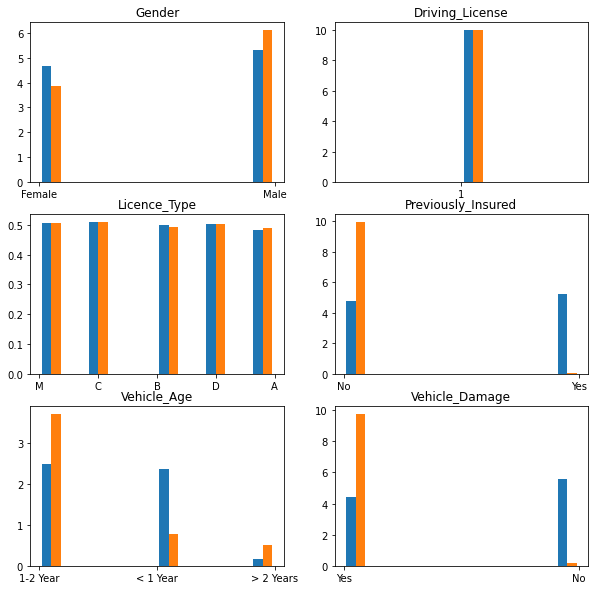

In [8]:
df_0=df_categorical[df['Target']==0]  # records wih target==1
df_1=df_categorical[df['Target']==1]  # records wih target==0


fig, axes = plt.subplots(3, 2,figsize=[10,10])     # plot 3 rows and 2 columns of charts and showing the distribution of target 
                                                   # in each chart
axes = axes.flatten()                              
i=0
for x in df_categorical.columns:
    plt.sca(axes[i])                   # set the current Axes
    plt.hist([df_0[x],df_1[x]],density=True) 
    plt.title(x)
    i+=1
plt.show()


In [9]:
 dummies = pd.get_dummies(df_categorical[['Gender','Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage','Licence_Type','Driving_License' ]], drop_first=True) 
# drop_first = true : create one column for those variable that has two values: 
# Gender,Vehicle_Damage,Licence_type,Driving_license and Previously_Insured    #, drop_first=True
dummies



,Gender_Male,Previously_Insured_Yes,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Licence_Type_B,Licence_Type_C,Licence_Type_D,Licence_Type_M
0,0,0,0,0,1,0,0,0,1
1,1,1,1,0,0,0,0,0,1
2,1,0,0,0,1,0,1,0,0
3,1,1,0,0,0,1,0,0,0
4,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
102346,0,1,1,0,0,1,0,0,0
102347,0,0,0,0,1,0,0,0,1
102348,1,0,0,1,1,0,0,0,1
102349,0,1,1,0,0,0,0,0,1


In [35]:
dummies.shape

(97260, 15)

# Numerical Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CA0F610>,
      dtype=object)

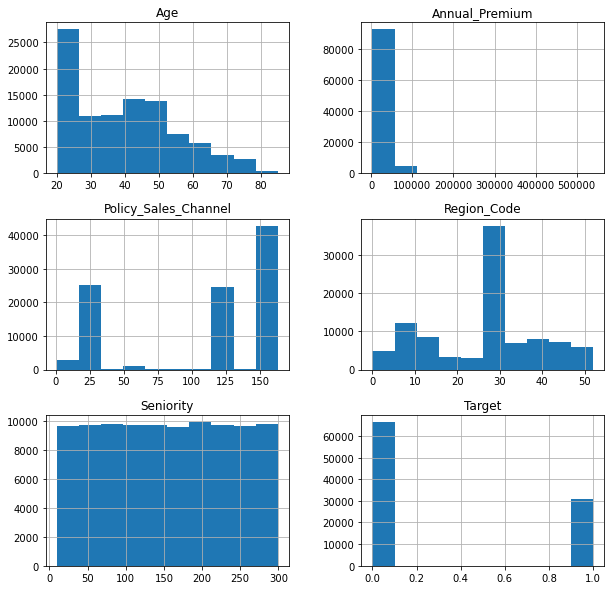

In [36]:
df_numerical.hist(figsize=(10,10))               #distribution of each Numerical Attributes along it's value 


In [ ]:
# The distribution of the Annual_Premium has kind of Logaritimic behaviour, changing it's intances value to the logaratimic Motion.

In [10]:
import math
pd.options.mode.chained_assignment = None

df_numerical['log_Annual_Premium']=df_numerical['Annual_Premium'].apply(math.log)    # Annual_Premium attribute has logaritmic behaviour 
                                                                                     # so we transform it by logaritm function into small scale
                                                                                     # to have a better understanding of the distribution 
df_numerical.head()


,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Seniority,Target,log_Annual_Premium
0,44,30,25741,154,152,0,10.155840
1,23,3,2630,152,256,0,7.874739
2,43,28,70720,52,224,0,11.166484
3,60,28,48512,26,86,0,10.789566
4,42,46,32169,124,132,0,10.378759


In [105]:
df_categorical.columns

Index(['Gender', 'Licence_Type', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E33B0D0>,
      dtype=object)

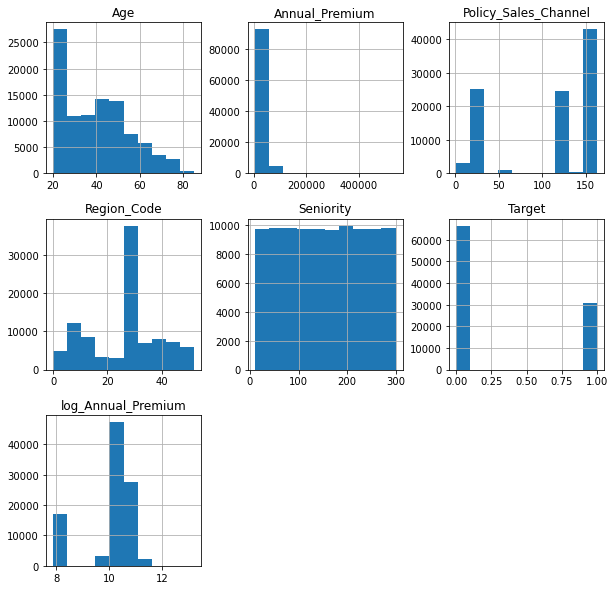

In [11]:
df_numerical.hist(figsize=(10,10))

# Univariate and Multi_Variate Analysis of the Numerical Attributes

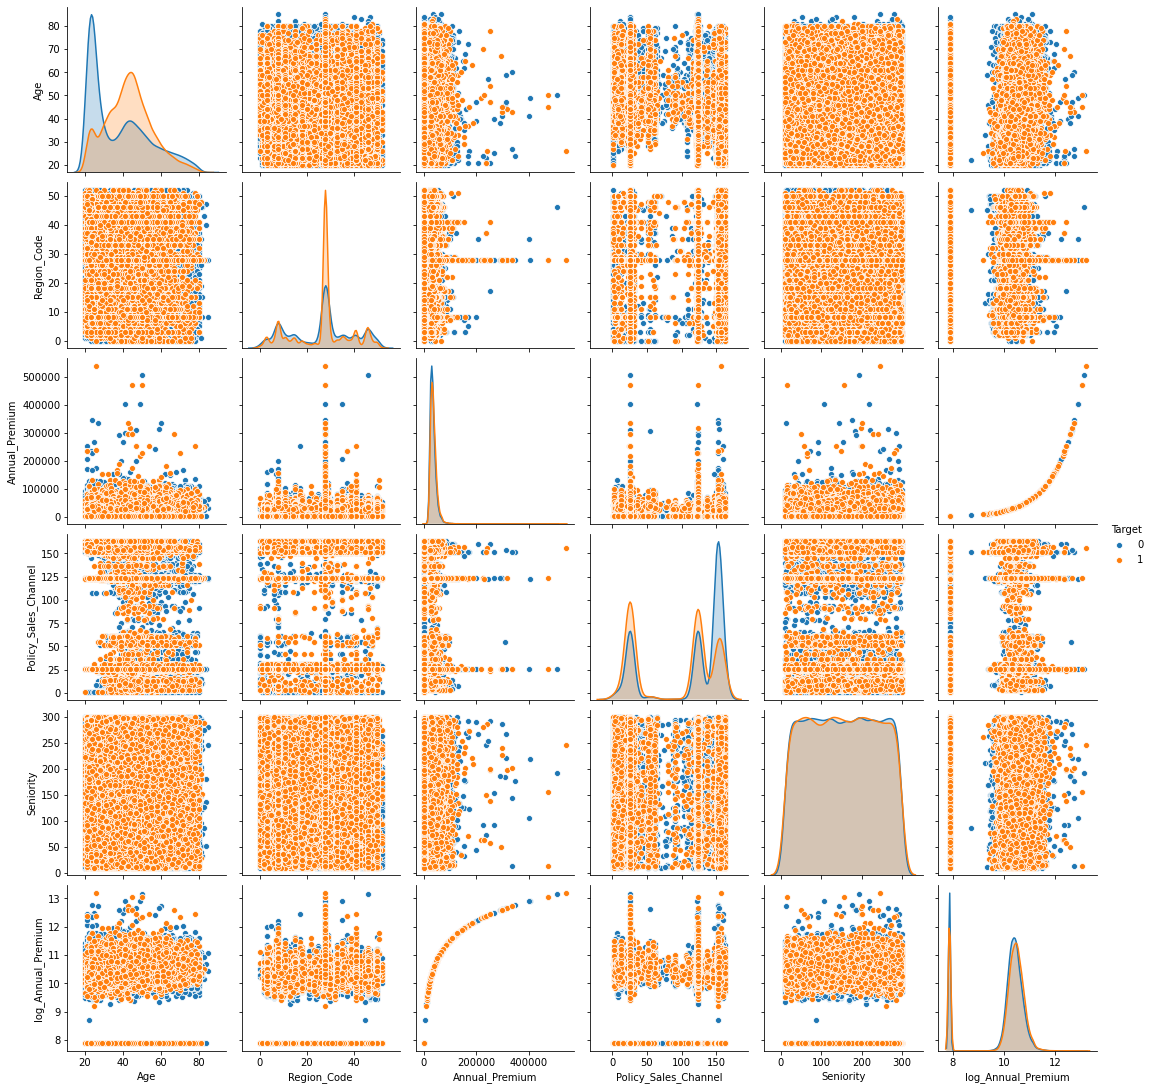

In [10]:
# We keep Log_Annual_Premium and remove the Annual_Premium as Numerical attributes.

sns.pairplot(df_numerical[['Age','Region_Code', 'Annual_Premium',
       'Policy_Sales_Channel', 'Seniority', 'Target', 'log_Annual_Premium']], hue='Target')

The Main Diameter of the Matrix of charts shows the distribution of the instances of each variables by the target
0 and 1(blue and orange color). The more different of the distribution between 0 and 1 target, the useful the variable
is for the Modeling and prediction.
Extra charts of the Matrix show the correlation betwen two variables and how the target points
are distributed along these variables(linear, Seperated well clustered,...)



# Standarize

In [12]:
# Numerical data should be standarized in order to be located in the same  scale and used as input for the caliberation process.
# Here, we use StandardScalar and standard the data using the mean and varaince.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_numerical)
scaled_df = pd.DataFrame(scaler.transform(df_numerical))
scaled_df.columns = df_numerical.columns

scaled_df.head()

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Seniority,Target,log_Annual_Premium
0,0.276960,0.269668,-0.284628,0.842532,-0.030806,-0.681716,0.139865
1,-1.128176,-1.822986,-1.599688,0.806397,1.211625,-0.681716,-2.106096
2,0.210049,0.114657,2.274762,-1.000329,0.829339,-0.681716,1.134939
3,1.347540,0.114657,1.011085,-1.470078,-0.819272,-0.681716,0.763829
4,0.143138,1.509759,0.081137,0.300514,-0.269735,-0.681716,0.359349


In [14]:
scaled_df.shape

(97260, 7)

In [15]:
scaled_df

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Seniority,Target,log_Annual_Premium
0,0.276960,0.269668,-0.284628,0.842532,-0.030806,-0.681716,0.139865
1,-1.128176,-1.822986,-1.599688,0.806397,1.211625,-0.681716,-2.106096
2,0.210049,0.114657,2.274762,-1.000329,0.829339,-0.681716,1.134939
3,1.347540,0.114657,1.011085,-1.470078,-0.819272,-0.681716,0.763829
4,0.143138,1.509759,0.081137,0.300514,-0.269735,-0.681716,0.359349
...,...,...,...,...,...,...,...
97255,-0.994354,0.424680,0.224872,0.806397,-0.257789,-0.681716,0.433777
97256,0.477694,0.114657,-0.010190,-1.470078,-0.484771,1.466886,0.308957
97257,2.150475,-1.435457,1.257584,0.300514,-0.747593,1.466886,0.848044
97258,-0.994354,-1.202940,-0.250373,0.806397,-0.329468,-0.681716,0.162626


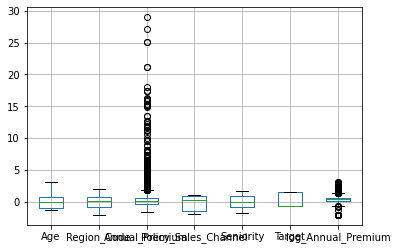

In [16]:
scaled_df.boxplot()

In [17]:
scaled_df.columns

Index(['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel',
       'Seniority', 'Target', 'log_Annual_Premium'],
      dtype='object')

In [18]:
# and use just log_Annual_Premium instead of Annual_Premium to have a more understandable distribution is small scale.
# removing the Target column in order to create the Input set.
X_numerical=scaled_df[['Age','Region_Code','Policy_Sales_Channel', 'Seniority',  'log_Annual_Premium']]

In [19]:
X_numerical

,Age,Region_Code,Policy_Sales_Channel,Seniority,log_Annual_Premium
0,0.276960,0.269668,0.842532,-0.030806,0.139865
1,-1.128176,-1.822986,0.806397,1.211625,-2.106096
2,0.210049,0.114657,-1.000329,0.829339,1.134939
3,1.347540,0.114657,-1.470078,-0.819272,0.763829
4,0.143138,1.509759,0.300514,-0.269735,0.359349
...,...,...,...,...,...
97255,-0.994354,0.424680,0.806397,-0.257789,0.433777
97256,0.477694,0.114657,-1.470078,-0.484771,0.308957
97257,2.150475,-1.435457,0.300514,-0.747593,0.848044
97258,-0.994354,-1.202940,0.806397,-0.329468,0.162626


In [20]:
dummies = dummies.reset_index()  #sorting the index of the dummies DataFrame in a sequential manner.

In [21]:
dummies

,index,Gender_Male,Previously_Insured_Yes,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Licence_Type_B,Licence_Type_C,Licence_Type_D,Licence_Type_M
0,0,0,0,0,0,1,0,0,0,1
1,1,1,1,1,0,0,0,0,0,1
2,2,1,0,0,0,1,0,1,0,0
3,3,1,1,0,0,0,1,0,0,0
4,4,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
97255,102346,0,1,1,0,0,1,0,0,0
97256,102347,0,0,0,0,1,0,0,0,1
97257,102348,1,0,0,1,1,0,0,0,1
97258,102349,0,1,1,0,0,0,0,0,1


In [22]:
del dummies['index']    #deleting the column ['Index'] which varies unconsistently from 0 to 102350.

In [23]:
dummies                 # true index from 0 to 97255

,Gender_Male,Previously_Insured_Yes,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Licence_Type_B,Licence_Type_C,Licence_Type_D,Licence_Type_M
0,0,0,0,0,1,0,0,0,1
1,1,1,1,0,0,0,0,0,1
2,1,0,0,0,1,0,1,0,0
3,1,1,0,0,0,1,0,0,0
4,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
97255,0,1,1,0,0,1,0,0,0
97256,0,0,0,0,1,0,0,0,1
97257,1,0,0,1,1,0,0,0,1
97258,0,1,1,0,0,0,0,0,1


In [24]:
print(dummies.shape)
print(X_numerical.shape)


(97260, 9)
(97260, 5)


In [25]:
X=pd.concat([X_numerical,dummies], axis = 1)    #concatnating  dummies and X_numerical Data and setting X as input 
X.tail()
X.shape

(97260, 14)

# Separate Train/Test sets

In [26]:
y=df['Target']                                 #setting target column as output
y

0         0
1         0
2         0
3         0
4         0
         ..
102346    0
102347    1
102348    1
102349    0
102350    0
Name: Target, Length: 97260, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    stratify=y, #preserve target propotions 
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(68082, 14) (29178, 14)


## Models

In [28]:
#importing modelings and algorithmic tools from skylearn inorder to process the caliberation.
from sklearn.model_selection import GridSearchCV  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score

# Caliberation and f1_score Validation

In [29]:
def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)  
    #  Defining the parameter Space
    
    #cv:cross_validation
    # setting the cross validetion equal to 3: creating iteratively 3 modes of dividing of data and making average the whole 
    # 3 repeatition in order to pervent overfitting
    # Gs: optimization method, which iteratively examine through the parameter to pick up the best parameter corresponding to the 
    # minimun J(objective function) or error.
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)

    print("f1_test: ", f1_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


# Roc curve Evaluation 

In [30]:
def roc(model,X_train,y_train,X_test,y_test):         #setting the roc function
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 
                                          #for drawing the roc curve which is based on the probability of the accurate prediction

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')   #scaling the chart between 0,1 : horizantal axis:[0,1]
                                                                 # vetical axis:[0,1]
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

# KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()                   #setting the Model structure
parameters = {'n_neighbors':np.arange(10,1000,100)}   # Defining the parameter space
#setting the hyper parameter varying from the 10 to 100 by step 100

In [25]:
hyperp_search(classifier,parameters)

f1_train: 0.656630 using {'n_neighbors': 210}
f1_test:  0.6555847185768445
[[15348  4572]
 [ 2514  6744]]
              precision    recall  f1-score   support

           0       0.86      0.77      0.81     19920
           1       0.60      0.73      0.66      9258

    accuracy                           0.76     29178
   macro avg       0.73      0.75      0.73     29178
weighted avg       0.78      0.76      0.76     29178



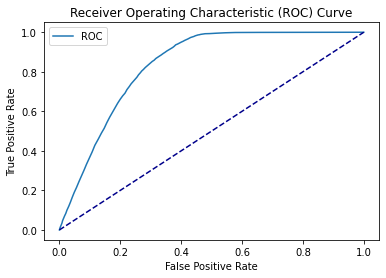

AUC: 0.84


In [26]:
# choosing the best parameter and finalize our model accordingly. 
model_knn = KNeighborsClassifier(n_neighbors=160) 
fpr1,tpr1=roc(model_knn,X_train,y_train,X_test,y_test)   

# Tree  ( best fit Model )


In [27]:

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()             # defining the model structure
parameters = {'criterion': ['entropy','gini'],    # Defining the Parameter Space 
              'max_depth': [1,2,3,4,5],           # d parameterization type(entropy and gini) and stop criteria
              'min_samples_split': [100],         # (min_samples_split,min_samples_leaf,max_depth)
              'min_samples_leaf': [80]}

hyperp_search(classifier,parameters)

f1_train: 0.692507 using {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 80, 'min_samples_split': 100}
f1_test:  0.6896377846877888
[[13586  6334]
 [ 1052  8206]]
              precision    recall  f1-score   support

           0       0.93      0.68      0.79     19920
           1       0.56      0.89      0.69      9258

    accuracy                           0.75     29178
   macro avg       0.75      0.78      0.74     29178
weighted avg       0.81      0.75      0.76     29178



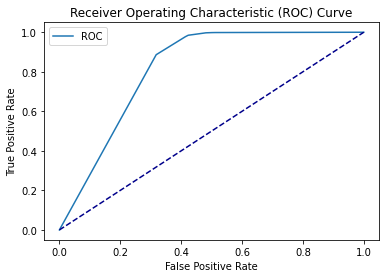

AUC: 0.82


In [28]:
# choosing the best parameter and finalize our model accordingly. 
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=80, min_samples_split=100)

fpr2,tpr2=roc(model_tree,X_train,y_train,X_test,y_test)


# Plotting the tree

In [29]:
from sklearn import tree
r = tree.export_text(model_tree,feature_names=X_test.columns.tolist(),max_depth=3)
print(r)

|--- Previously_Insured_Yes <= 0.50
|   |--- Vehicle_Damage_Yes <= 0.50
|   |   |--- Policy_Sales_Channel <= 0.82
|   |   |   |--- class: 0
|   |   |--- Policy_Sales_Channel >  0.82
|   |   |   |--- class: 0
|   |--- Vehicle_Damage_Yes >  0.50
|   |   |--- Age <= -0.89
|   |   |   |--- class: 0
|   |   |--- Age >  -0.89
|   |   |   |--- class: 1
|--- Previously_Insured_Yes >  0.50
|   |--- Vehicle_Damage_Yes <= 0.50
|   |   |--- Licence_Type_M <= 0.50
|   |   |   |--- class: 0
|   |   |--- Licence_Type_M >  0.50
|   |   |   |--- class: 0
|   |--- Vehicle_Damage_Yes >  0.50
|   |   |--- Age <= 0.44
|   |   |   |--- class: 0
|   |   |--- Age >  0.44
|   |   |   |--- class: 0



# Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB   #or alternative NB implementations  #based on probability 

model = GaussianNB()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import f1_score
print("f1_score: ", f1_score(y_test, y_pred))

print("f1_test: ", f1_score(y_test, y_pred))


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1_score:  0.6873079287031346
f1_test:  0.6873079287031346
[[12092  7828]
 [  312  8946]]
              precision    recall  f1-score   support

           0       0.97      0.61      0.75     19920
           1       0.53      0.97      0.69      9258

    accuracy                           0.72     29178
   macro avg       0.75      0.79      0.72     29178
weighted avg       0.83      0.72      0.73     29178



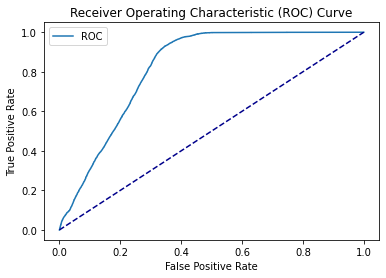

AUC: 0.82


In [31]:
y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr3,tpr3=roc(model,X_train,y_train,X_test,y_test)

# Logistic

In [32]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()                                          # model identification
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,2,3,4,5,10], "max_iter":[2000] }  #defining the parameter space
# setting the hyper_parameter c to give setting weight
                                                                           # between the erro and regularization(prevent overfitting)
# logistic regression is optimization problem, so max_iteration should be defined for the number of examining through parameter
# within time                                          

hyperp_search(classifier,parameters)

f1_train: 0.654132 using {'C': 10, 'max_iter': 2000}
f1_test:  0.6473586200137215
[[15377  4543]
 [ 2653  6605]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81     19920
           1       0.59      0.71      0.65      9258

    accuracy                           0.75     29178
   macro avg       0.72      0.74      0.73     29178
weighted avg       0.77      0.75      0.76     29178



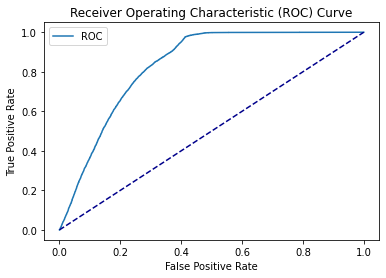

AUC: 0.83


In [33]:
model = LogisticRegression(C=1, max_iter=1000)

fpr4,tpr4=roc(model,X_train,y_train,X_test,y_test)


# svm

In [34]:
from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear','rbf'], "C":[0.1,1]}    # Defining the parameter Space
                                                         # Kernel: can be linear, polynomial,radial based function and sigmoidal, 
                                                         # using different function to seperate targets[0,1] points.
                                                         # setting the hyper_parameter c to give setting weight
                                                         # between the erro and regularization(prevent overfitting)
    
    
hyperp_search(classifier,parameters)

f1_train: 0.680670 using {'C': 1, 'kernel': 'rbf'}
f1_test:  0.6760063509853367
[[15002  4918]
 [ 2020  7238]]
              precision    recall  f1-score   support

           0       0.88      0.75      0.81     19920
           1       0.60      0.78      0.68      9258

    accuracy                           0.76     29178
   macro avg       0.74      0.77      0.74     29178
weighted avg       0.79      0.76      0.77     29178



In [ ]:
model = SVC(C=100, kernel='linear',probability=True)

fpr5,tpr5=roc(model,X_train,y_train,X_test,y_test)


# Multi-layer Perceptron classifier

In [31]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(10, 5),(100,20,5)],  "max_iter": [2000], "alpha": [0.001,0.1]}   
# alpha=weight of Penalty Term
# defining the parameter space(the hidden layer number and Neuron numbers and alafa to preventing the over fitting)
# max_iter:2000   : setting the number of back propation(passing inputs(batch_size) input and setting new weights for the data)

hyperp_search(classifier,parameters)

f1_train: 0.672400 using {'alpha': 0.1, 'hidden_layer_sizes': (10, 5), 'max_iter': 2000}
f1_test:  0.6618423626051241
[[15494  4426]
 [ 2490  6768]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82     19920
           1       0.60      0.73      0.66      9258

    accuracy                           0.76     29178
   macro avg       0.73      0.75      0.74     29178
weighted avg       0.78      0.76      0.77     29178



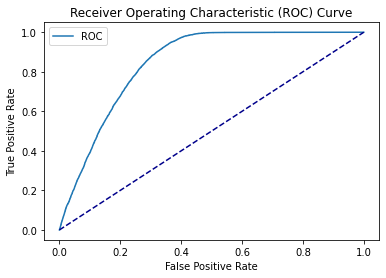

AUC: 0.85


In [32]:
model_MLP=MLPClassifier(hidden_layer_sizes=(10,5), alpha=0.1, max_iter=2000)    

fpr6,tpr6=roc(model_MLP,X_train,y_train,X_test,y_test)

In [ ]:
plt.plot(fpr1, tpr1, label= "KNN")
plt.plot(fpr2, tpr2, label= "Tree")
plt.plot(fpr3, tpr3, label= "NB")
plt.plot(fpr4, tpr4, label= "Logistic")    
plt.plot(fpr5, tpr5, label= "SVM")
plt.plot(fpr6, tpr6, label= "NeuralNet")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
